In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [90]:
# load data

prices_d0 = pd.read_csv('data/prices_round_3_day_0.csv', delimiter=';')
prices_d1 = pd.read_csv('data/prices_round_3_day_1.csv', delimiter=';')
prices_d1["timestamp"] += prices_d0["timestamp"].iloc[-1]
prices_d2 = pd.read_csv('data/prices_round_3_day_2.csv', delimiter=';')
prices_d2["timestamp"] += prices_d1["timestamp"].iloc[-1]

prices = pd.concat([prices_d0, prices_d1, prices_d2])

del prices_d0, prices_d1, prices_d2

In [91]:
prices["mid_price"] = prices["ask_price_1"] - prices["bid_price_1"]

In [92]:
trades_d0 = pd.read_csv('data/trades_round_3_day_0_nn.csv', delimiter=';')
trades_d1 = pd.read_csv('data/trades_round_3_day_1_nn.csv', delimiter=';')
trades_d1["timestamp"] += trades_d0["timestamp"].iloc[-1]
trades_d2 = pd.read_csv('data/trades_round_3_day_2_nn.csv', delimiter=';')
trades_d2["timestamp"] += trades_d1["timestamp"].iloc[-1]

trades = pd.concat([trades_d0, trades_d1, trades_d2])

del trades_d0, trades_d1, trades_d2

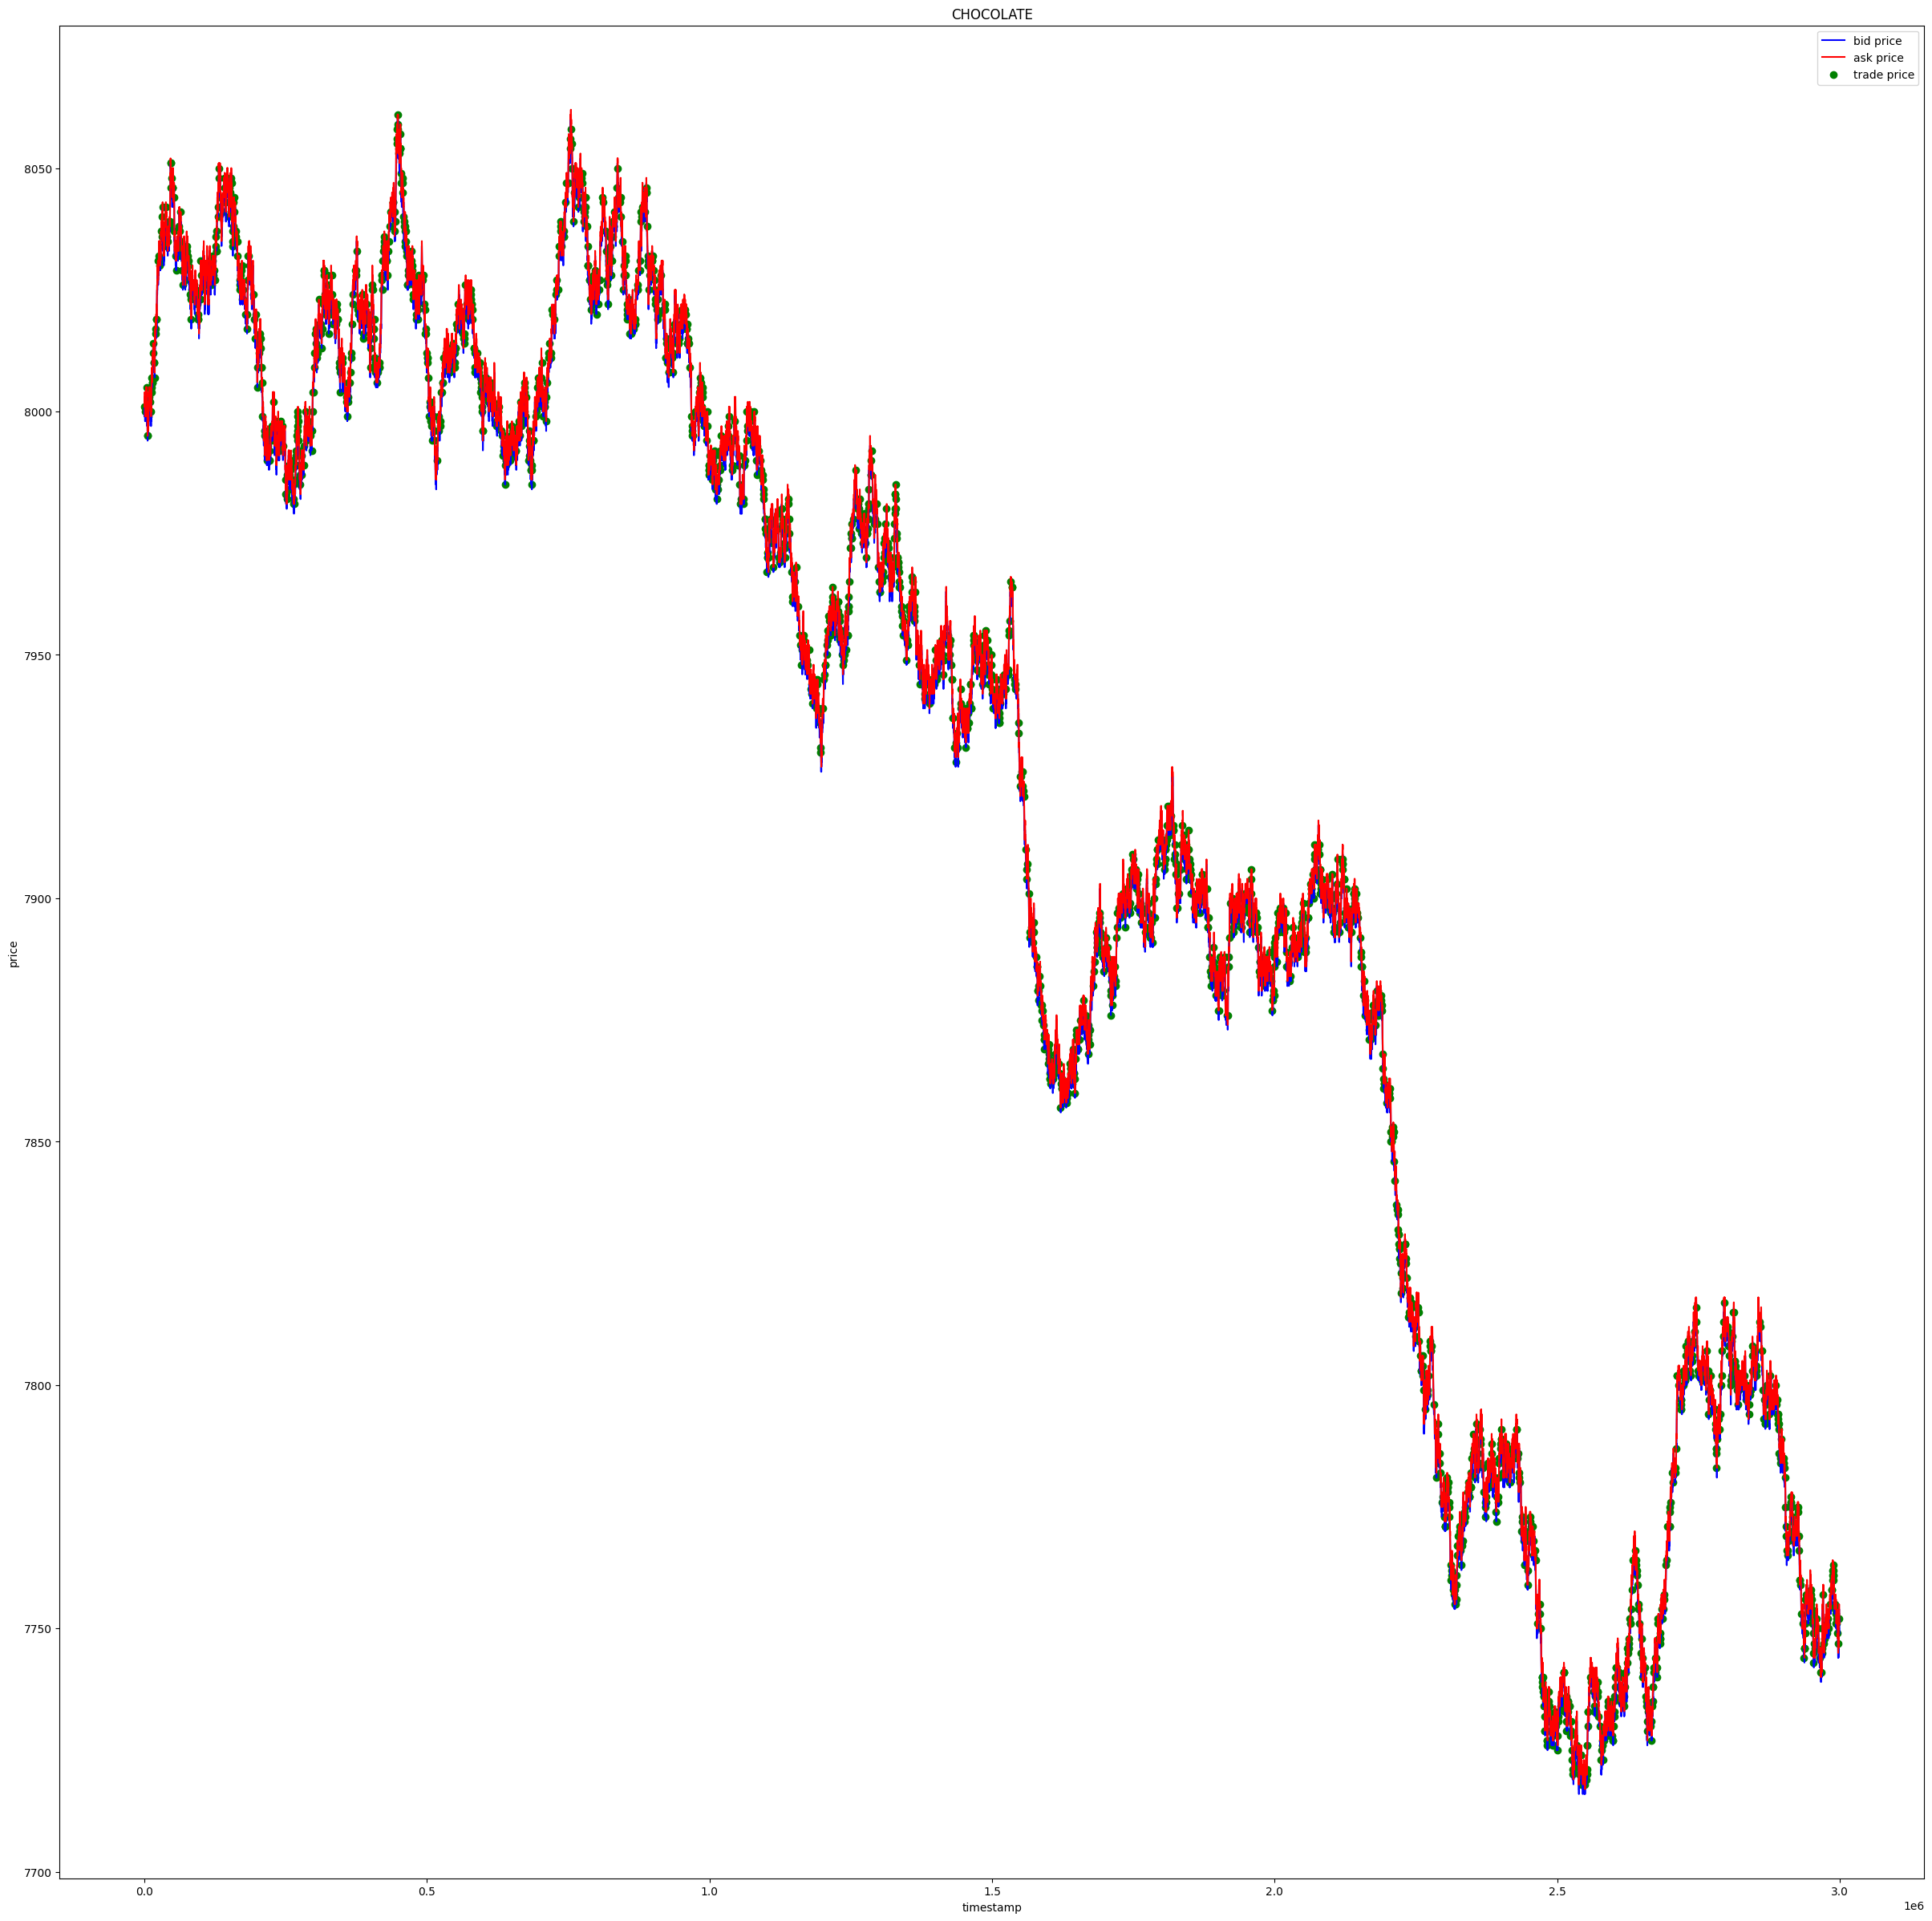

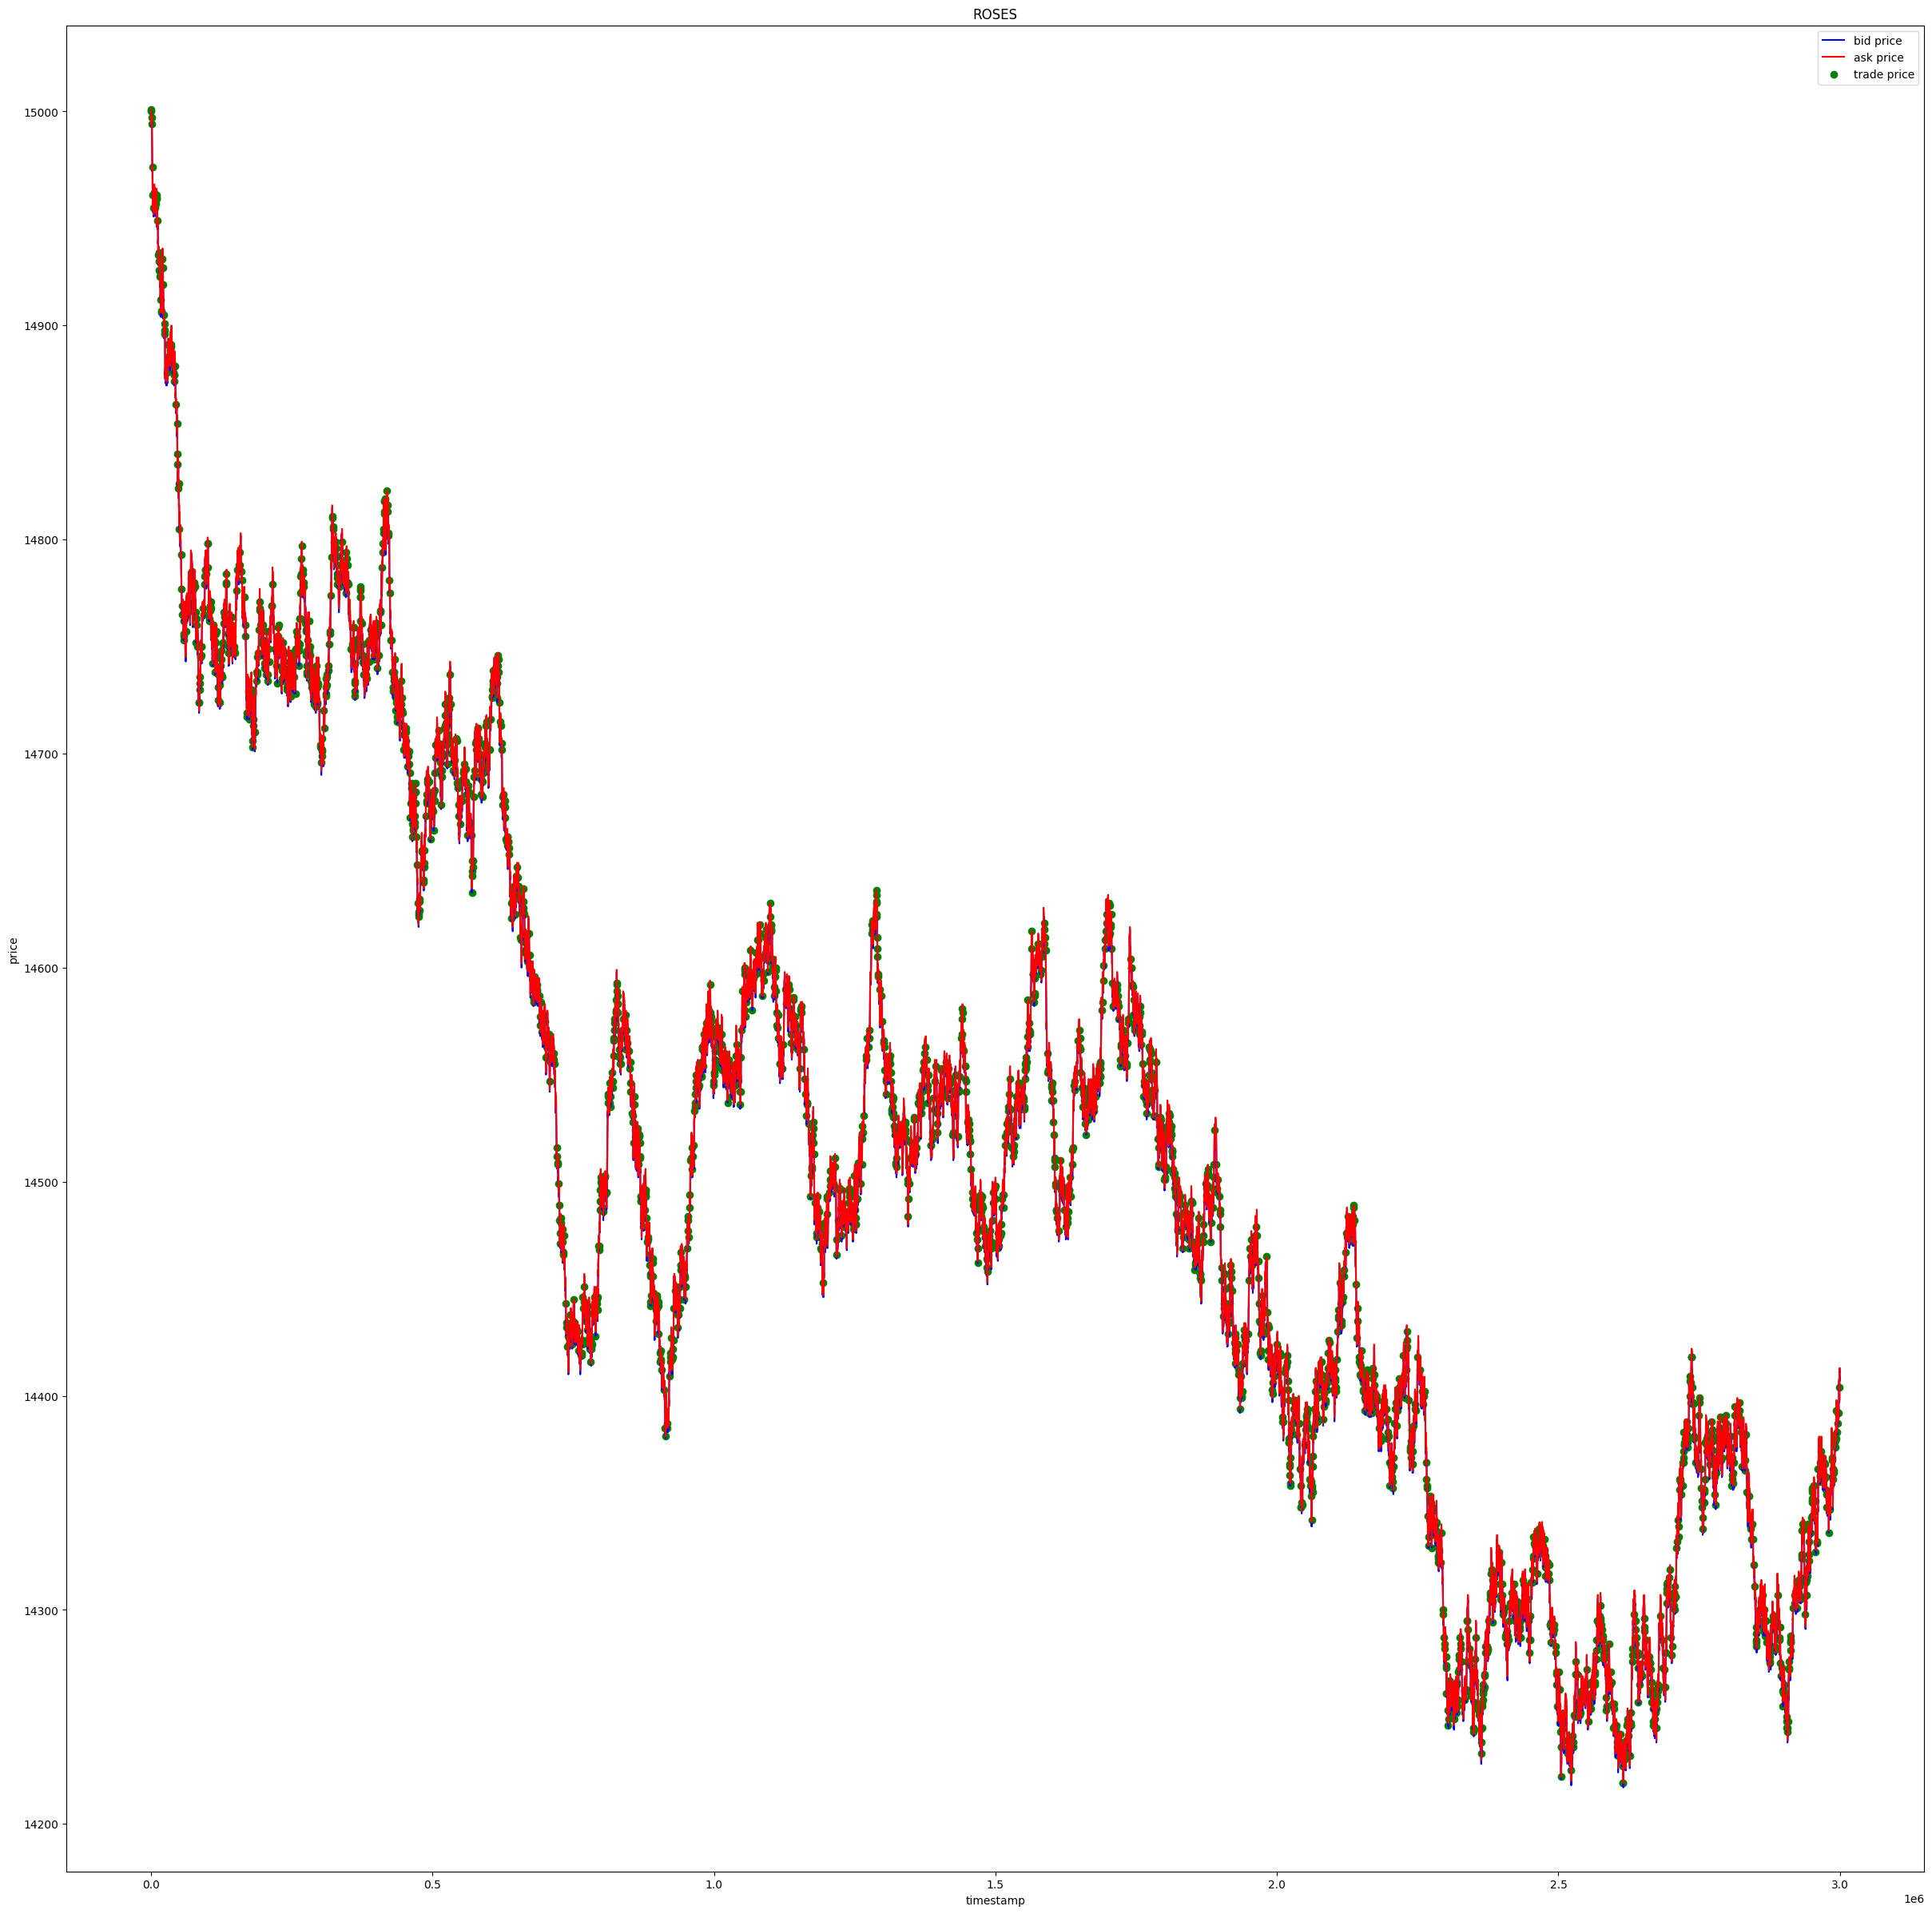

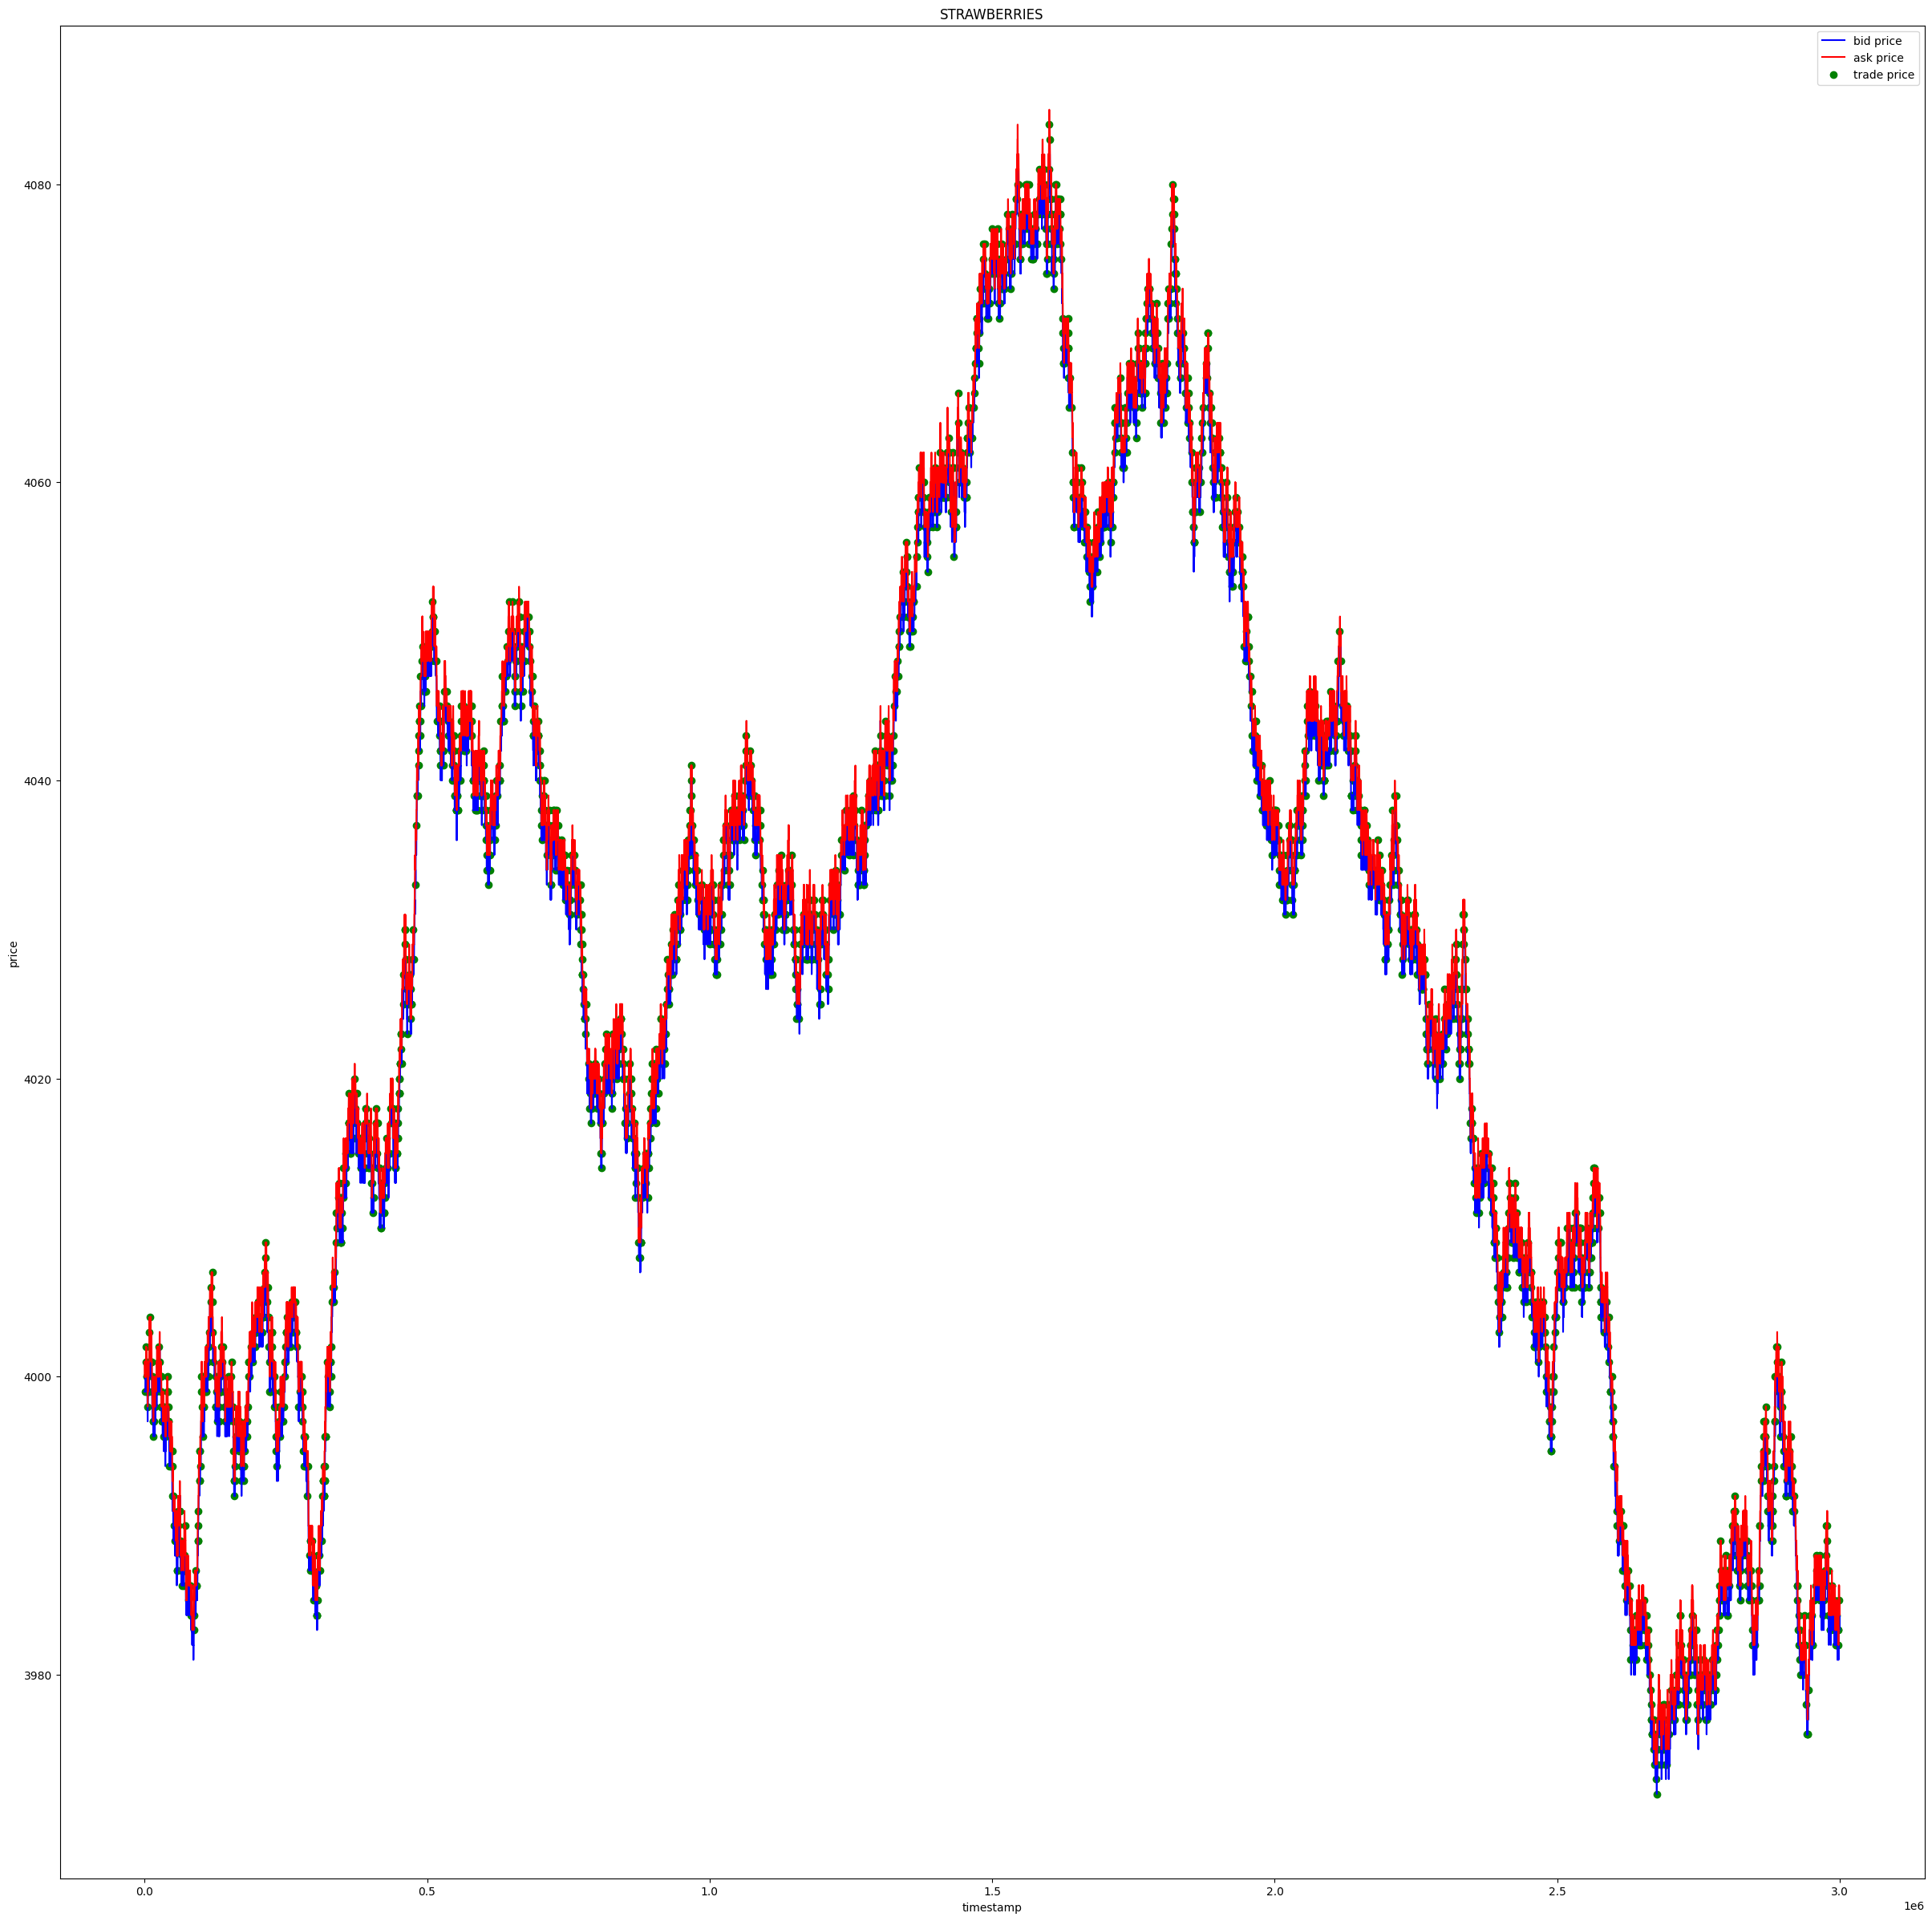

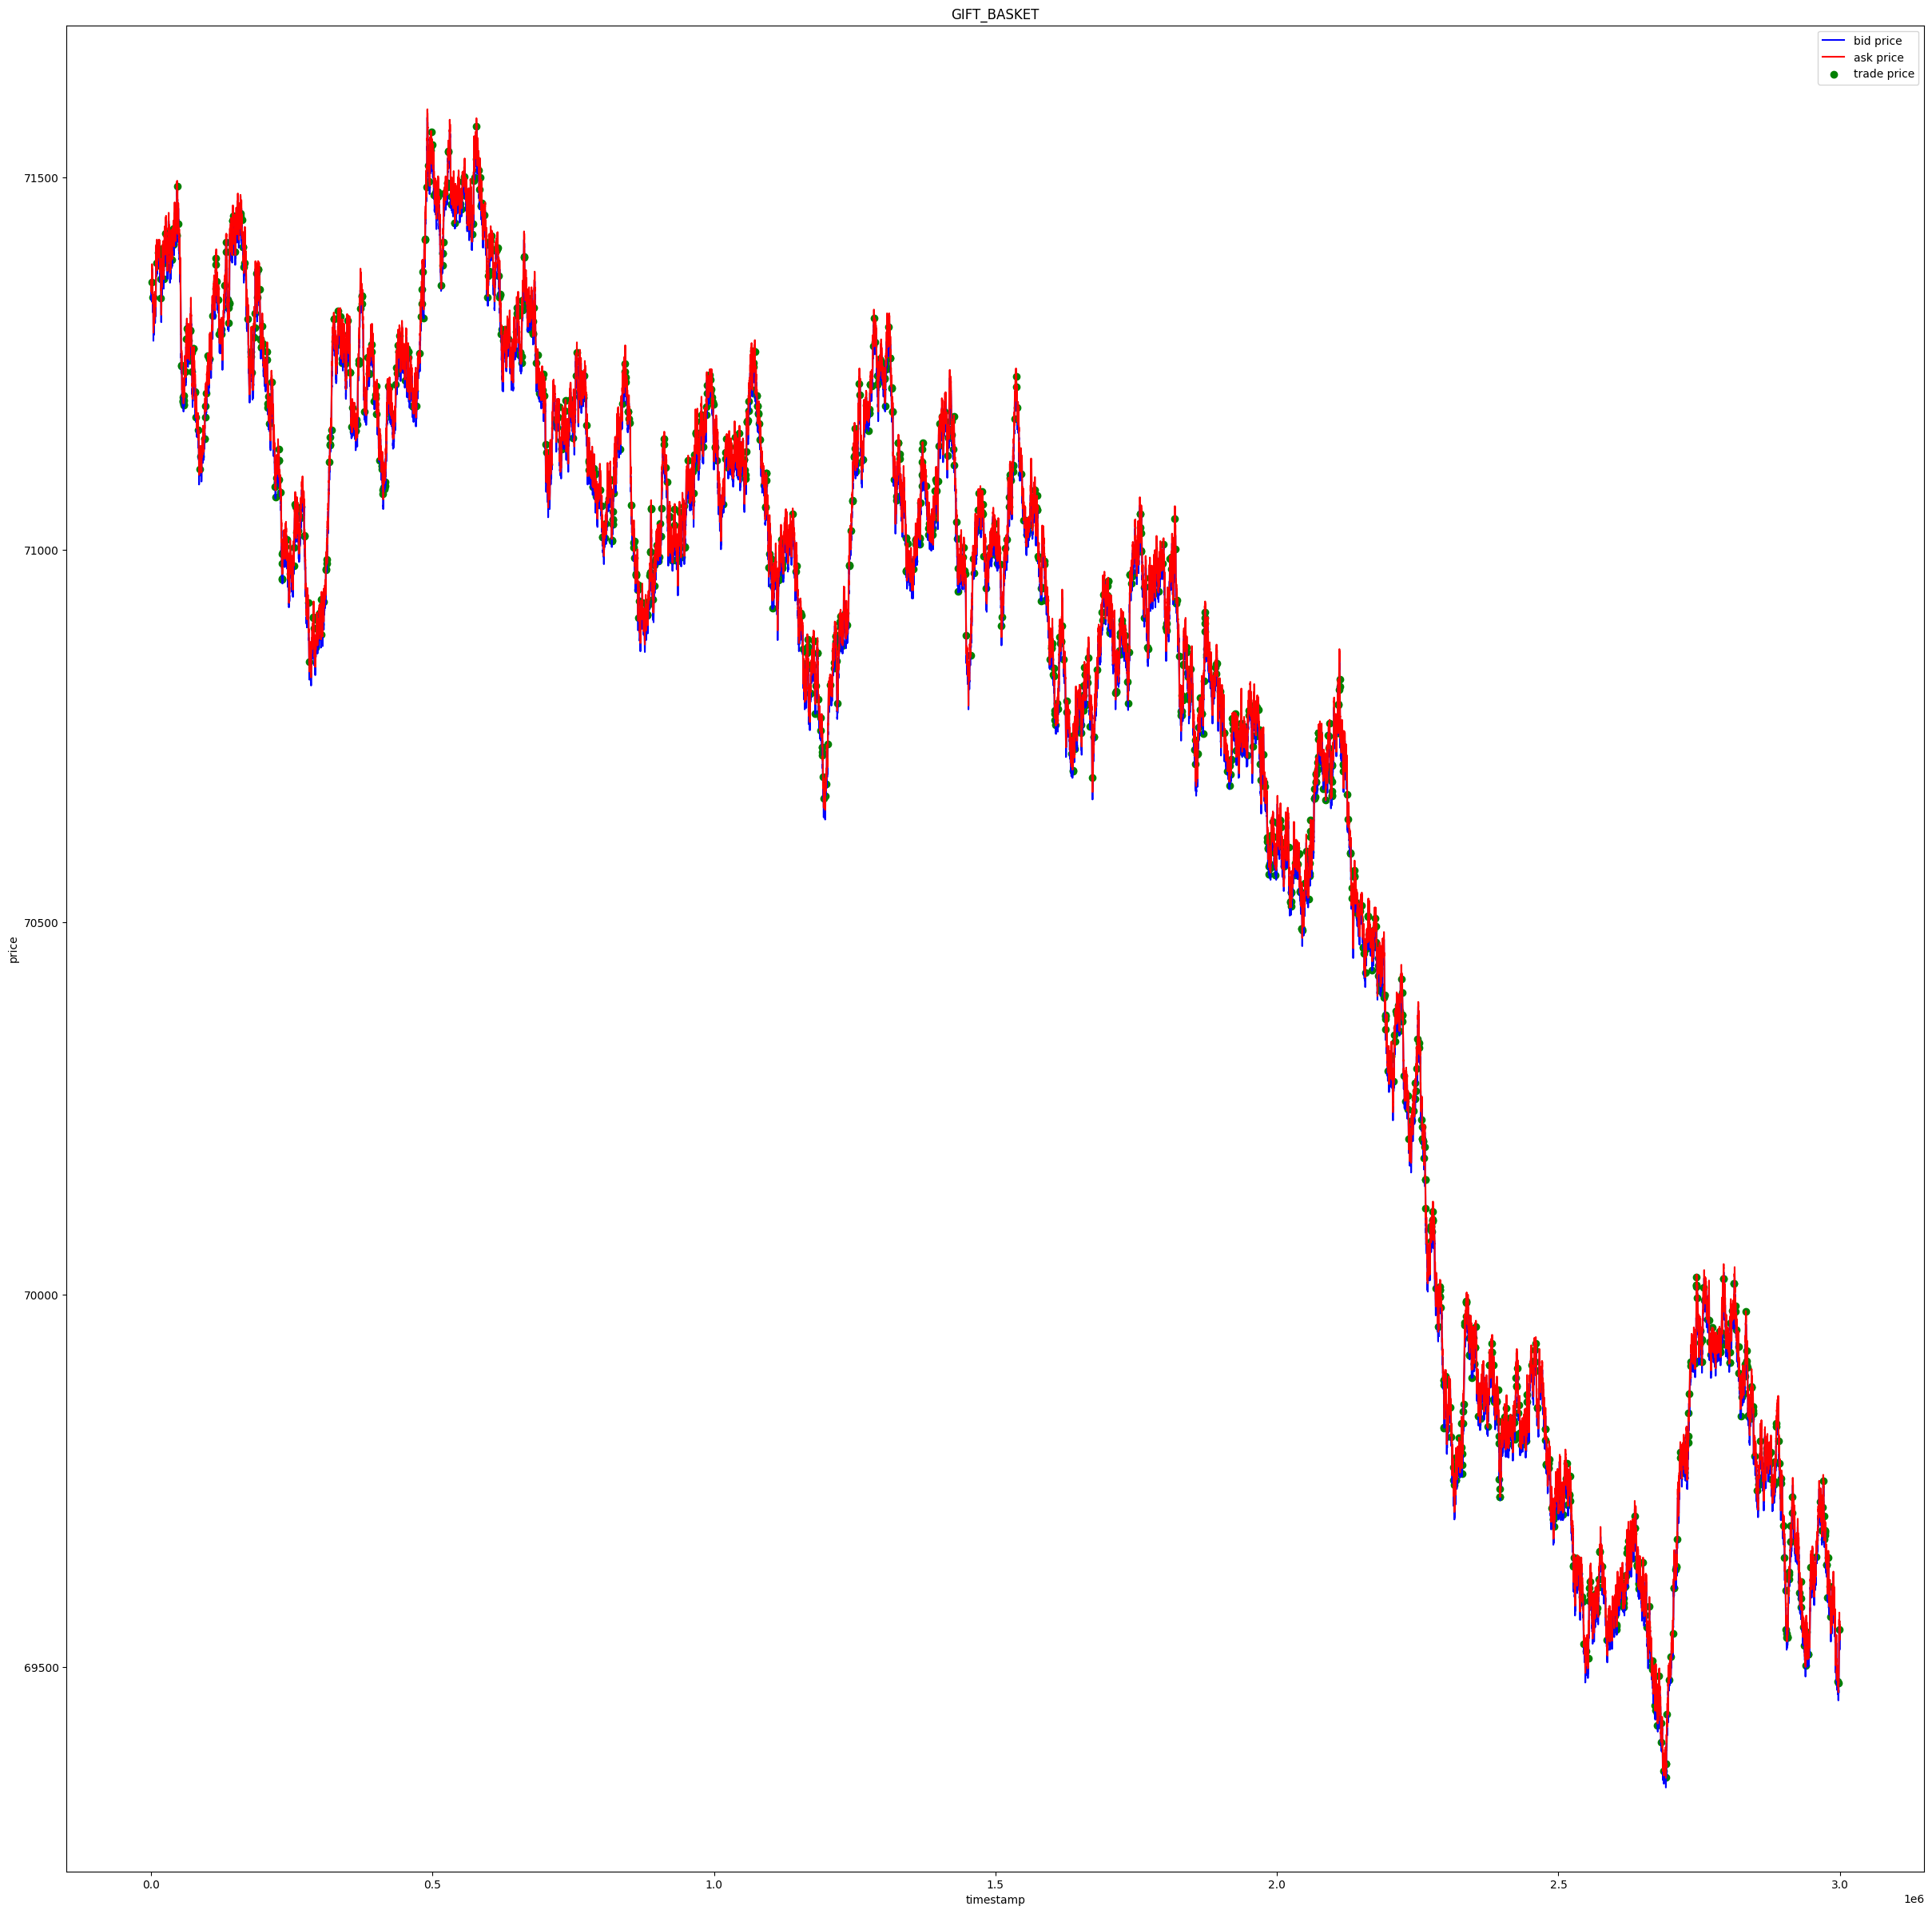

In [93]:
# plot all the bids, asks per product: CHOCOLATE, ROSES, STRAWBERRIES, and GIFT_BASKET

products = ["CHOCOLATE", "ROSES", "STRAWBERRIES", "GIFT_BASKET"]

for product in products:
    product_prices = prices[prices["product"] == product]
    product_trades = trades[trades["symbol"] == product]

    fig, ax = plt.subplots(figsize=(30,30))
    ax.plot(product_prices["timestamp"], product_prices["bid_price_1"], label="bid price", color="blue")
    ax.plot(product_prices["timestamp"], product_prices["ask_price_1"], label="ask price", color="red")
    ax.scatter(product_trades["timestamp"], product_trades["price"], label="trade price", color="green")
    ax.set_title(product)
    ax.set_xlabel("timestamp")
    ax.set_ylabel("price")
    ax.legend()
    plt.show()

In [96]:
# Plot the price of the basket vs the value of the underlying products: 4 chocolates, 1 rose, 3 strawberries

# set index to timestamp
prices.set_index("timestamp", inplace=True)

chocolate_prices = prices[prices["product"] == "CHOCOLATE"]
rose_prices = prices[prices["product"] == "ROSES"]
strawberry_prices = prices[prices["product"] == "STRAWBERRIES"]
basket_prices = prices[prices["product"] == "GIFT_BASKET"]

basket_prices["underlying_value"] = 4 * chocolate_prices["mid_price"] + rose_prices["mid_price"] + 3 * strawberry_prices["mid_price"]

basket_prices["value_ratio"] = basket_prices["mid_price"] / basket_prices["underlying_value"]

# reset index
prices.reset_index(inplace=True)

basket_prices.reset_index(inplace=True)

/var/folders/r2/pw988w7d4qj5t2yych02l3m80000gp/T/ipykernel_92463/1804094093.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  basket_prices["underlying_value"] = 4 * chocolate_prices["mid_price"] + rose_prices["mid_price"] + 3 * strawberry_prices["mid_price"]
/var/folders/r2/pw988w7d4qj5t2yych02l3m80000gp/T/ipykernel_92463/1804094093.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  basket_prices["value_ratio"] = basket_prices["mid_price"] / basket_prices["underlying_value"]


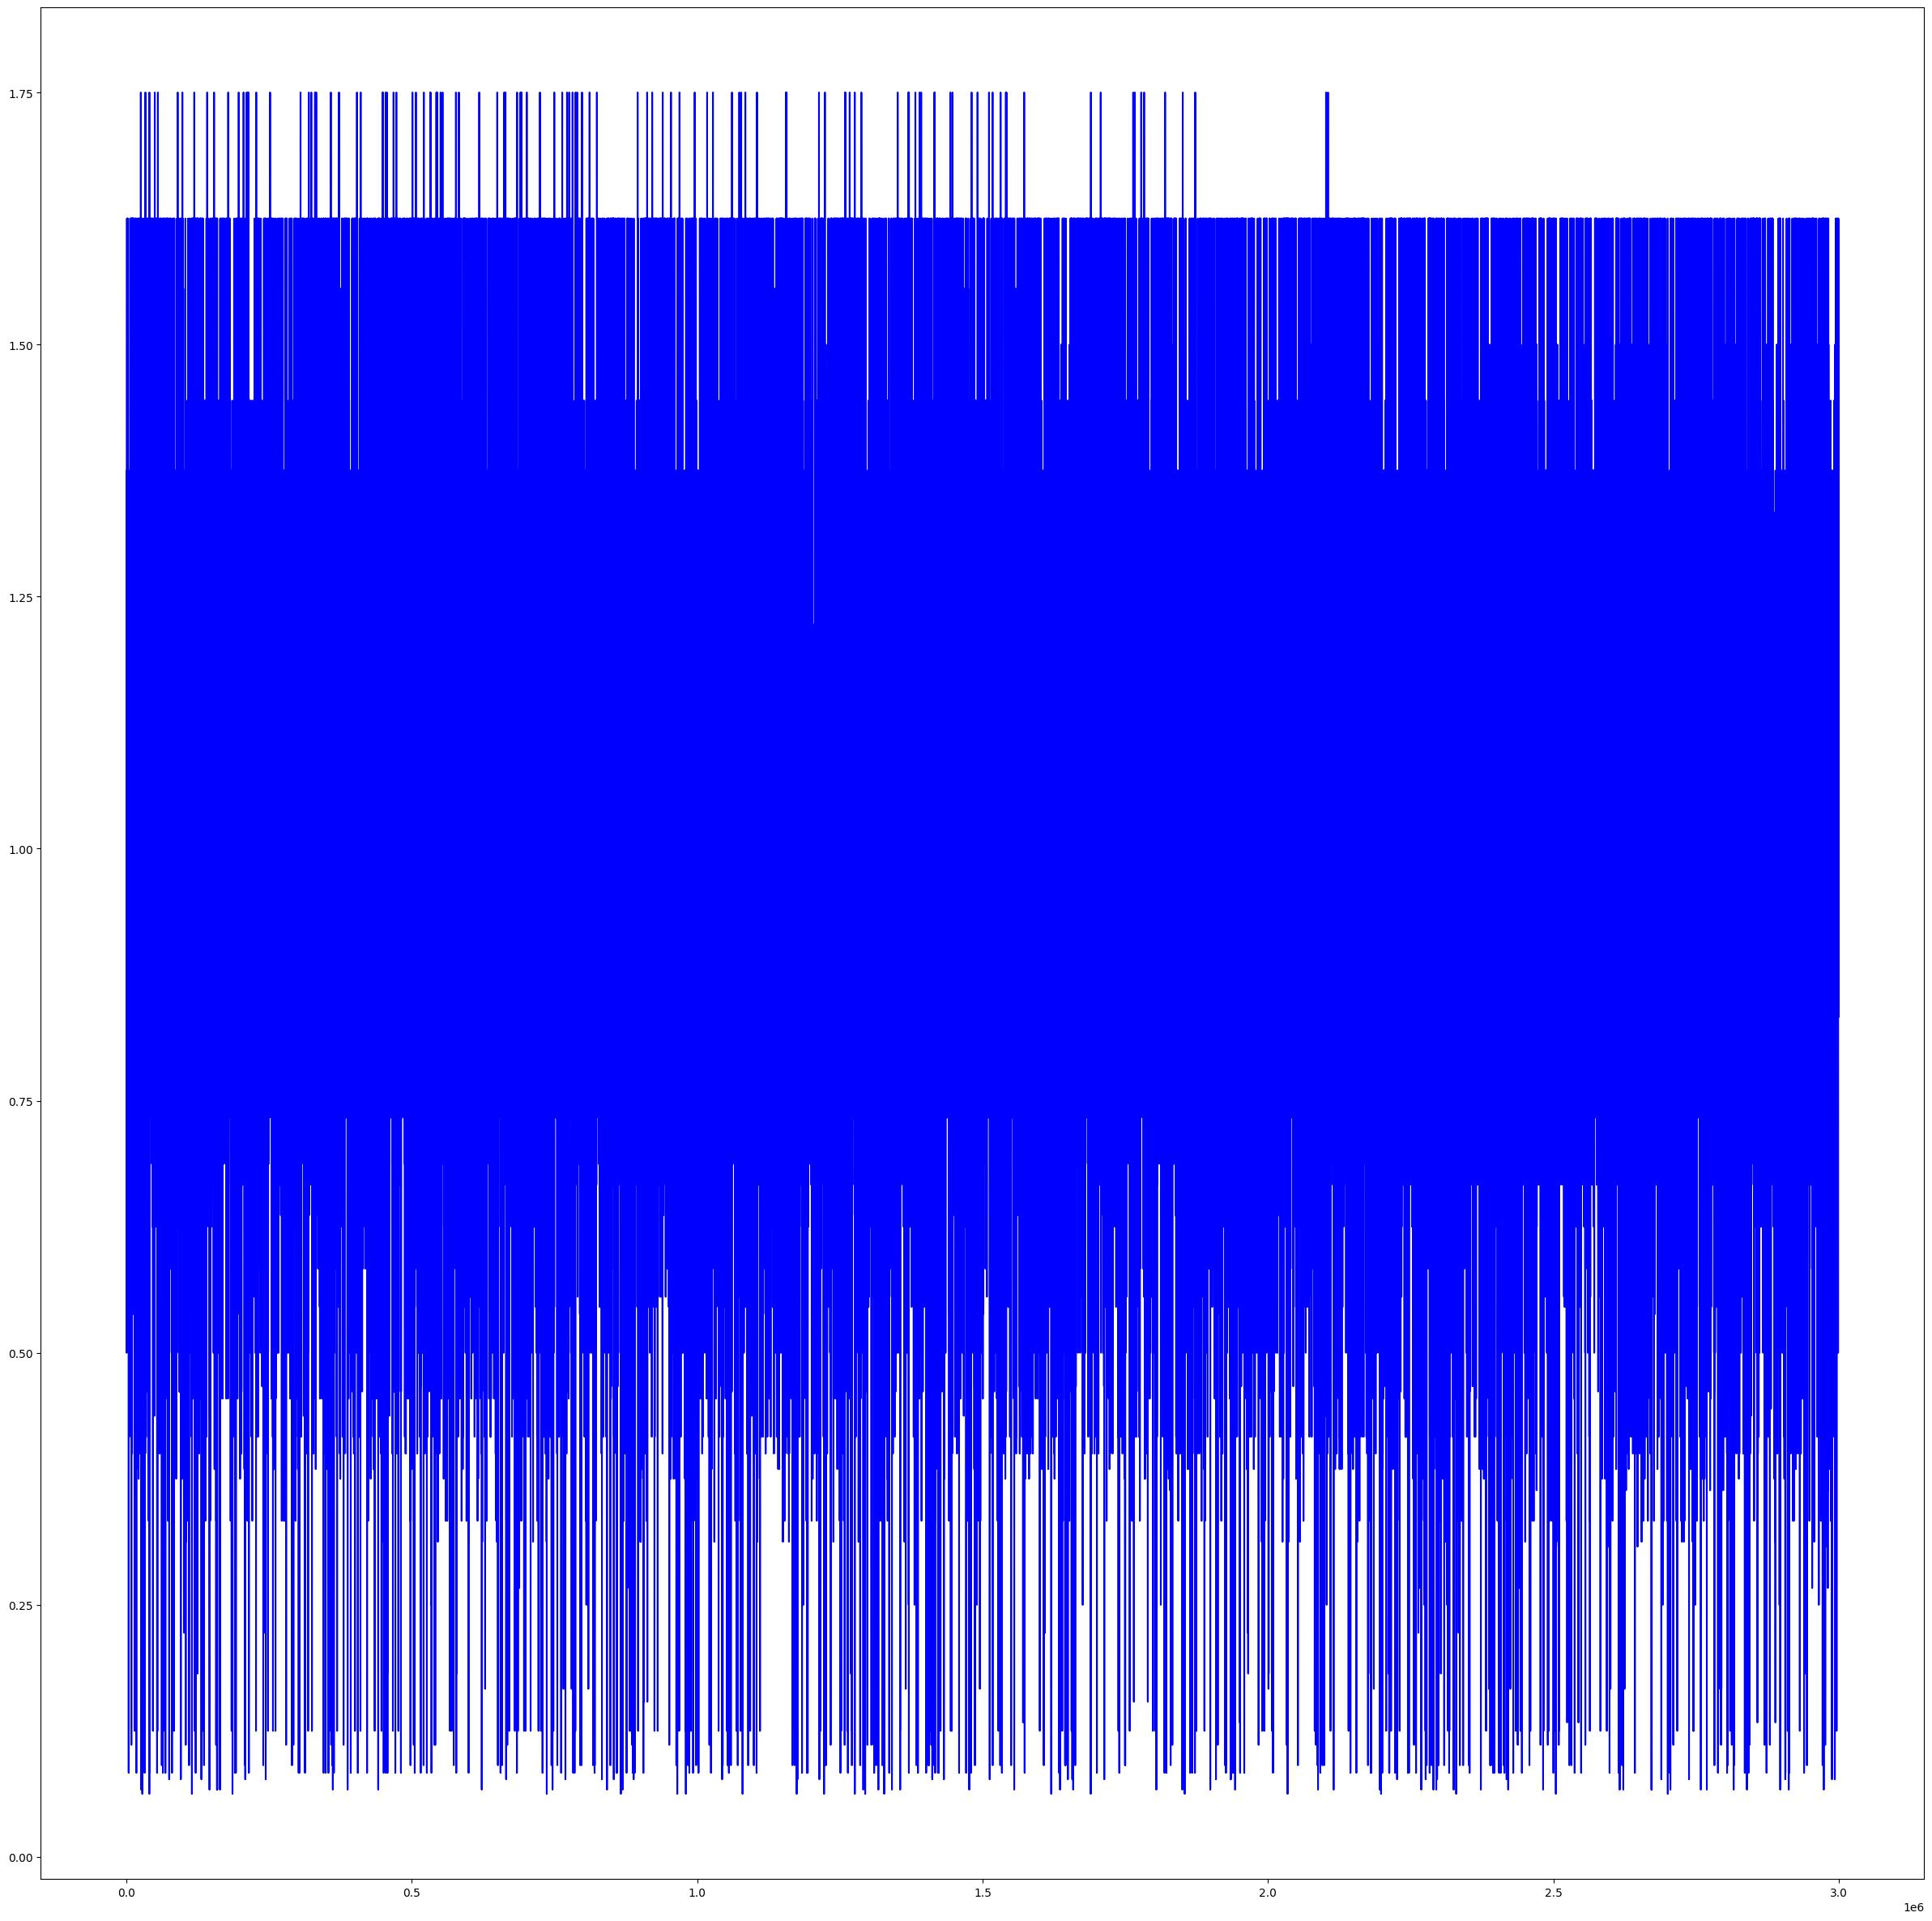

In [97]:


# plot the value_ratio of the basket

fig, ax = plt.subplots(figsize=(30,30))
ax.plot(basket_prices["timestamp"], basket_prices["value_ratio"], label="basket price", color="blue")